# Diabetes Progression Prediction Tutorial

The `scikit-learn` library is a popular machine learning library for Python, and provides tools for data analysis and machine learning. In this tutorial, we will use `scikit-learn` to predict progression of diabetes in patients.

## Setup

To run this tutorial on your local computer, you will need to install `scikit-learn`. You can install `scikit-learn` using `pip`:

```bash
pip install scikit-learn
```

First, we will import the required libraries.

In [1]:
# import libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from matplotlib import pyplot as plt

## Load Dataset

Next, we will load and visualize our dataset, retrieved from [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

> "Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

The dataset contains 442 patients, with 10 features each. The features are described below:

| Category | Description                   |
| -------- | ----------------------------- |
| Age      | age in years                  |
| Sex      | sex                           |
| BMI      | body mass index               |
| BP       | average blood pressure        |
| s1       | tc, total serum cholesterol   |
| s2       | ldl, low-density lipoproteins |
| s3       | hdl, high-density lipoproteins|
| s4       | tch, total cholesterol / HDL  |
| s5       | ltg, possibly log of serum triglycerides level |
| s6       | glu, blood sugar level        |

The target variable is a quantitative measure of disease progression one year after baseline.


In [2]:
# load the dataset
data = load_diabetes()

# print the names of the 13 features
print("Patient Features: ", data.feature_names)

Patient Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Let's extract the relevant features from our dataset. We can see that, as expected, the dataset has 442 patients, with 10 features each.

In [3]:
# save features and target variables
features = data['data']
target = data['target']

# get feature and label names
feature_names = data['feature_names']

# show number of data points
print("Number of Samples: ", len(features))

# show number of features
print("Number of Features: ", len(feature_names))

Number of Samples:  442
Number of Features:  10


Now, let's examine the first few samples of our dataset. Note that the output variable is not binary, but rather a continuous variable.

In [4]:
# define number of rows to show
number_samples = 2 #@param {type:"slider", min:1, max:10, step:1}

# show first n records
print("Data: ", features[0:number_samples])

# show target values (0 = malignant, 1 = benign)
print("Targets: ", target[0:number_samples])

Data:  [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]]
Targets:  [151.  75.]


# Split Dataset

Next, we will split our dataset into training and testing sets. We will use 80% of the data for training and 20% for testing.

In [5]:
# set test size
test_size = 0.2 #@param {type:"slider", min:0.05, max:0.4, step:0.05}

# pick a seed for reproducibility
seed = 42 #@param {type:"integer"}

# split data into training and test sets
train, test, train_target, test_target = train_test_split(features, target, test_size = test_size, random_state = seed)

# print samples in training and test sets
print("Training Set: ", len(train))
print("Test Set: ", len(test))

Training Set:  353
Test Set:  89


# Train Model

Next, we will train a simple neural network model on our training data. We will use the `MLPRegressor` class from `sklearn.neural_network` to create our model. We will use 3 hidden layers with 30 neurons each and a maximum of 1000 iterations to train our model. For more details on the `MLPRegressor` class, see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html).

In [6]:
# define model parameters
layer_1 = 30 #@param {type:"slider", min:10, max:100, step:10}
layer_2 = 30 #@param {type:"slider", min:10, max:100, step:10}
layer_3 = 30 #@param {type:"slider", min:10, max:100, step:10}
max_iter = 1000 #@param {type:"slider", min:500, max:5000, step:50}
activation = "relu" #@param ["relu", "logistic", "tanh"]
solver = "adam" #@param ["lbfgs", "sgd", "adam"]

# create a neural network regressor model
model = neural_network.MLPRegressor(hidden_layer_sizes = (layer_1,layer_2,layer_3), max_iter = max_iter, activation = activation, solver = solver, random_state = seed)

# print model details
print(model)

MLPRegressor(hidden_layer_sizes=(30, 30, 30), max_iter=1000, random_state=42)


Next, we will train our model on our training data.

In [7]:
# train the model
model.fit(train, train_target)

/Users/an583/miniforge3/envs/neuroKG/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(30, 30, 30), max_iter=1000, random_state=42)

# Evaluate Model

Finally, we will evaluate our model on our testing data. We will use the `accuracy_score` function from `sklearn.metrics` to calculate the accuracy of our model.

In [8]:
# make predictions on the test set
predictions = model.predict(test)

# compute the errors
mae = mean_absolute_error(test_target, predictions)
mape = mean_absolute_percentage_error(test_target, predictions)
mse = mean_squared_error(test_target, predictions)

# print the errors
print("Mean Absolute Error: ", mae)
print("Mean Absolute Percentage Error: ", mape)
print("Mean Squared Error: ", mse)

Mean Absolute Error:  42.524416502710075
Mean Absolute Percentage Error:  0.3692871666482013
Mean Squared Error:  2855.40912426797


Visualize the predictions of our model on the testing data.

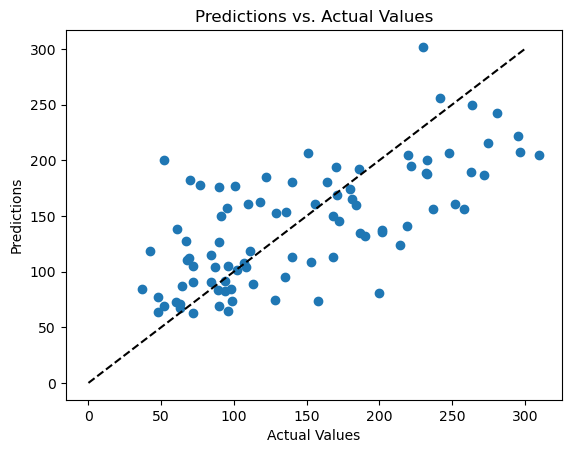

In [9]:
# plot the predictions vs the actual values
plt.scatter(test_target, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Predictions vs. Actual Values")

# add a line to show perfect predictions
plt.plot([0, 300], [0, 300], '--k')
plt.show()